## <font color= "green"> HOLA


Mi nombre es Esteban González y voy a desarrollar el siguiente proyecto. He decidido ir colocando comentarios en markdown de color verde para cada paso que voy dando en el proyecto explicando lo que hago para una mejor compresión. 


## <font color= "green"> IMPORTAR LIBRERÍAS



Lo primero que realizo es importar todas las librerías con las que estimo que voy a estar trabajando en el presente proyecto

In [42]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
from math import factorial
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind


<font color="green">A continuación asigno a la variable data el conjunto de datos suministrado

In [43]:
data = pd.read_csv(r'\Users\esteb\PROYECTOS ANÁLISIIS DE DATOS\Proyecto Integrador Sprint 6\proyecto_sprint_6\games.csv')

## <font color= "green"> PREPROCESAMIENTO DE DATOS

<font color="green">Hago una simple exploración para conocer los datos del DF

In [44]:
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10252,Wasteland 2,PS4,2015.0,Role-Playing,0.08,0.00,0.02,0.02,NaN,NaN,NaN
9252,Robots,DS,2005.0,Action,0.12,0.00,0.00,0.01,NaN,6.7,E
15079,Payout Poker & Casino,PSP,NaN,Misc,0.02,0.00,0.00,0.00,NaN,NaN,NaN
13524,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00,NaN,tbd,E
15294,Azada,3DS,2012.0,Puzzle,0.00,0.02,0.00,0.00,NaN,tbd,E
15793,Clover no Kuni no Alice: Wonderful Wonder World,PSP,2011.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7170,Bust-A-Move 4,PS,1998.0,Puzzle,0.12,0.08,0.00,0.01,NaN,NaN,NaN
756,Star Wars: Rogue Squadron,N64,1998.0,Simulation,1.60,0.46,0.08,0.03,NaN,NaN,NaN
10414,Ennichi no Tatsujin,Wii,2006.0,Misc,0.00,0.00,0.10,0.00,NaN,NaN,NaN
916,Game Party 2,Wii,2008.0,Misc,1.28,0.43,0.00,0.17,29.0,4.6,E


<font color="green">Luego antes de cualquier modificación aplico el método describe para conocer la distribución de los datos numéricos en las columnas para ubicarme en la amplitud y distribución de los mismos

In [45]:
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<font color="green">Como paso siguiente voy a buscar valores ausentes y duplicados en el DF.

In [46]:
display('Valores ausentes en cada columna:', data.isna().sum())
display('Los porcentajes de valores ausentes para cada columna respecto de su total es de:', (100*data.isna().sum())/data.shape[0])
print('El total de valores duplicados es de:', data.duplicated().sum())

'Valores ausentes en cada columna:'

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

'Los porcentajes de valores ausentes para cada columna respecto de su total es de:'

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

El total de valores duplicados es de: 0


<font color="green"> Antes de seguir con cualquier análisis, recorro con un bucle las columnas para cambiar los nombres por minúsculas y quitar espacios que pudieran tener

In [47]:
new_col_names = []
for names in data.columns:
    names_ready = names.strip().lower()
    new_col_names.append(names_ready)
data.columns = new_col_names


In [48]:
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12093,Fairy Tail: Zelef Kakusei,PSP,2012.0,Action,0.0,0.0,0.07,0.0,NaN,NaN,NaN


<font color="green"> Empezando con en análisis de los tipos de datos y planteos para valores ausentes:
- Un gran porcentaje de valores ausentes se aprecian en las columnas user_score, rating y critic_score. Dado que no disponemos de tiempo para buscar específicamente esos valores en datos externos, vamos a dejarlos como valores ausentes, ya que al remplazarlos, podríamos alterar todo posterior análisis.
- Los valores ausentes en nombres de juegos vamos a explorarlos y probablemente eliminarlos ya que no hay manera de saber a que correspondían.
- Para los valores de año de lanzamiento, es probable que los distintos juegos tengan esa información para alguna de las plataformas y no todas, por lo que vamos a tratar de tomar esos datos y rellenarlos.

In [49]:
data['year_of_release'] = data.groupby('name')['year_of_release'].ffill()
data['year_of_release'].isna().sum()

191

<font color= "green"> De los valores ausentes en año de lanzamiento, agrupando por otras plataformas, pudimos completar en 78 casos los valores, permaneciendo 191 casos sin información de año de lanzamiento. Esos valores voy a dejarlos ausentes ya que asignarles un parámetro como media o mediana alteraría los calculos posteriores

<font color="green"> Habiendo remplazado los valores ausentes en la columna año de lanzamiento vamos a borrar las filas con nombres de juegos ausentes

In [50]:
data = data.dropna(subset=['name'])
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [51]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [52]:
data.loc[:, 'user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)
data['user_score'].unique()

array([8.0, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0, 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7.0, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0.0,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1.0, 9.7], dtype=object)

In [53]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [54]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [55]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### <font color= "green">Conclusión de preprocesamiento de datos ausentes
Al inspeccionar el DF observamos algunos detalles importantes.
- En las filas que corresponden a user_score, critic_score y rating hay un alto porcentaje de valores ausentes, lo que condicionaría una alteración en el análisis ulterior si hicieramos remplazo por valores como media y mediana, por lo que decidí dejarlos ausentes.
- En las filas que corresponden con year_of_release, hay juegos que tienen fecha para algunas plataformas pero para otras no. Lo que hice en este punto es usar el método ffill de fillna para rellenar con los valores disponibles para el mismo juego en diferentes consolas.
- Repecto de los juegos con valores ausentes en name, correspondían con dos filas y las eliminé, ya que no hay manera de saber a que juego correspondían.
- Dentro de la columna de user_score habia un string 'tbd' que impedía la conversión de los datos a float, por lo que remplace el string por el valor nulo nan (ya que establecí en el primer punto no remplazar valores ausentes en esta columna por su impacto en el analis posterior)
- Por último agregué una nueva columna que calcula la cantidad total de ventas para cada juego sumando sus ventas parciales por región

Ahora el dataframe no presenta valores ausentes que sean suceptibles de ser remplazados, los datos estan en el tipo de datos correctos, y podemos avanzar hacia el procesamiento propiamente dicho.

## <font color= "green"> ANÁLISIS DE DATOS

#### <font color="green">  VENTAS DE JUEGOS POR AÑO

<font color= "green"> 
Comenzando con nuestro análisis de los datos del DF vamos a ir desglosando distintos enfoques para lograr determinar tendencias.
En primer lugar vamos a calcular cuantos juegos se lanzaron por año y graficarlo para tener una idea del comportamiento de la industria de los juegos en las últimas décadas.
Para ellos vamos a agrupar acorde al año de lanzamiento y hacer un conteo total de titulos lanzados por año.

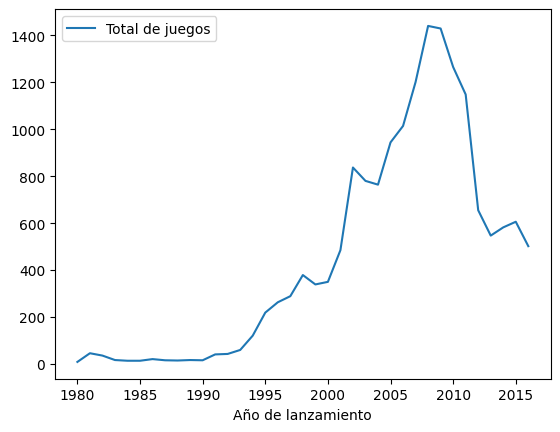

In [56]:
juegos_por_año = data.groupby('year_of_release')['name'].count().reset_index()
juegos_por_año.columns = ['Año de lanzamiento', 'Total de juegos']
juegos_por_año.plot(x= 'Año de lanzamiento')
plt.show()


#### <font color="green">  VENTAS POR PLATAFORMA DE JUEGOS

<font color="green">
A continuación vamos a calcular por plataforma cuales son las ventas totales y vamos a elegir las 5 plataformas con mas títulos lanzados para analizar.
Vamos a agrupar por año las ventas totales para cada plataforma y evaluar sus cambios en el tiempo.
Por último vamos a fusionar los datos de las 5 plataformas en un gráfico que nos permita evaluar el comportamiento de las 5 plataformas mas importantes en el transcurso del tiempo y sus ventas totales anuales.

,platform,total_sales
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


,ventas_por_año_ps2,ventas_por_año_ds,ventas_por_año_ps3,ventas_por_año_wii,ventas_por_año_x360
year_of_release,,,,,
1985.0,0.0,1.0,0.0,0.0,0.0
2000.0,82.0,0.0,0.0,0.0,0.0
2001.0,185.0,0.0,0.0,0.0,0.0
2002.0,280.0,0.0,0.0,0.0,0.0
2003.0,256.0,0.0,0.0,0.0,0.0
2004.0,259.0,23.0,0.0,0.0,0.0
2005.0,260.0,118.0,0.0,0.0,20.0
2006.0,260.0,201.0,28.0,46.0,93.0
2007.0,215.0,377.0,90.0,186.0,123.0


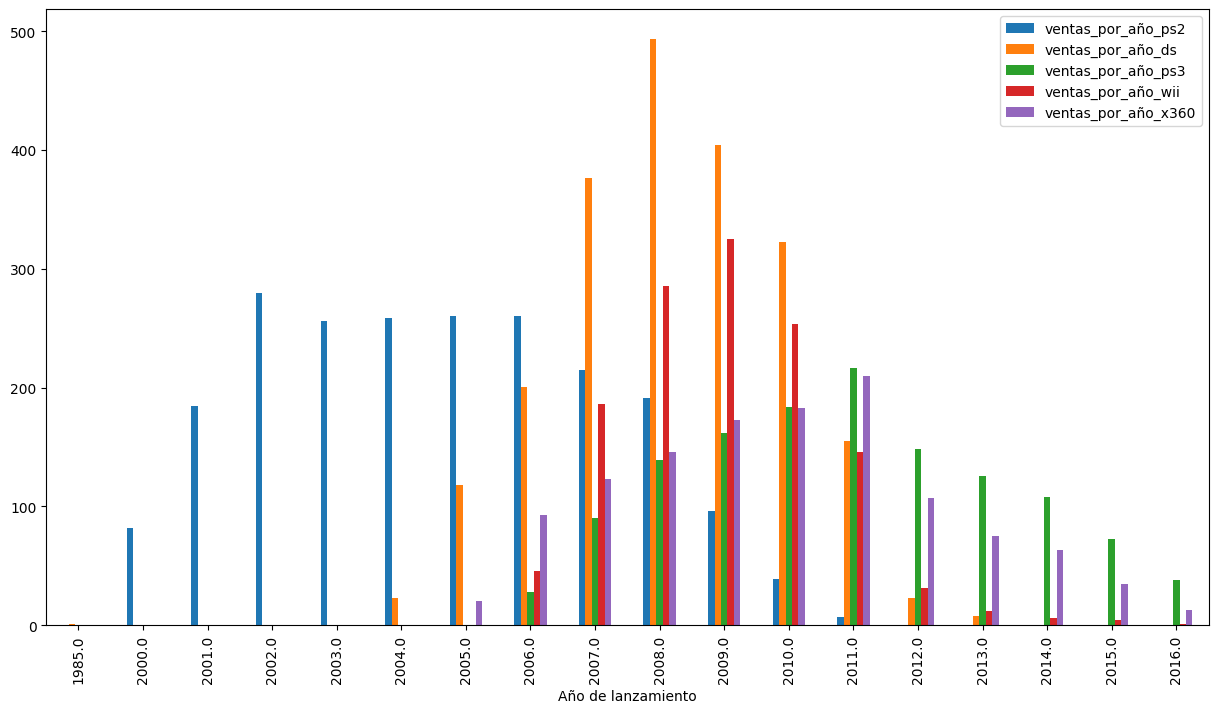

In [57]:
ventas_por_plataforma = data.groupby('platform')['total_sales'].count().reset_index().sort_values(by=  'total_sales', ascending=False)
display(ventas_por_plataforma.head(5))
ps2_sales_year = data.query('platform == "PS2"').groupby('year_of_release')['name'].count().reset_index().set_index('year_of_release')
ps2_sales_year.columns = ['ventas_por_año_ps2']
ds_sales_year = data.query('platform == "DS"').groupby('year_of_release')['name'].count().reset_index().set_index('year_of_release')
ds_sales_year.columns = ['ventas_por_año_ds']
ps3_sales_year = data.query('platform == "PS3"').groupby('year_of_release')['name'].count().reset_index().set_index('year_of_release')
ps3_sales_year.columns = ['ventas_por_año_ps3']
wii_sales_year = data.query('platform == "Wii"').groupby('year_of_release')['name'].count().reset_index().set_index('year_of_release')
wii_sales_year.columns = ['ventas_por_año_wii']
x360_sales_year = data.query('platform == "X360"').groupby('year_of_release')['name'].count().reset_index().set_index('year_of_release')
x360_sales_year.columns = ['ventas_por_año_x360']
plataformas_mas_vendidas_por_año = ps2_sales_year.merge(ds_sales_year, on= 'year_of_release', how='outer').merge(ps3_sales_year, on= 'year_of_release', how='outer').merge(wii_sales_year, on= 'year_of_release', how='outer').merge(x360_sales_year, on= 'year_of_release', how='outer').reset_index().set_index('year_of_release').fillna(0).sort_values(by= 'year_of_release')
display(plataformas_mas_vendidas_por_año)
plataformas_mas_vendidas_por_año.plot(kind= 'bar', width=0.5, figsize=[15,8], xlabel= 'Año de lanzamiento')
plt.show()

<font color="green"> Es notorio que todas las plataformas evaluadas presentan un curva con aceleración y desaceleración en cuanto a sus ventas a lo largo de los años, característica que comparten todas ellas, variando quizás el tiempo que tardaron unas respecto de otras. 
Vamos a evaluar los tiempos que tardan las plataformas en aparecer y desaparacer adoptando los datos comprendidos entre 2004  y 2016 ya que claramente la industria tuvo un gran apogéo a partir del año 2000. 


También, para que sea representativo, vamos a seguir utilizando el filtrado de las 5 plataformas con mas juegos vendidos, lo que considero que representa plataformas exitosas. Lo que voy a hacer es calcular el año inicial de aparición de cada una y el año del último juego de cada una de esas plataformas, y voy a promediar esos valores para obtener un aproximado que represente cuantos años tardaron en aparecer plataformas y cuantos años en desaparecer.

In [58]:
plataformas_lideres = ventas_por_plataforma['platform'].head(5)
data_filtered = data.query('year_of_release >= 2004 and platform in @plataformas_lideres')
first_appearance = data_filtered.groupby('platform')['year_of_release'].min()
last_appearance = data_filtered.groupby('platform')['year_of_release'].max()
time_to_appear = last_appearance - first_appearance
target_year = 2017
time_to_desappear = target_year - last_appearance
average_appearance_time = time_to_appear.mean()
average_desappear_time = time_to_desappear.mean()
print("Tiempo promedio de aparición de nuevas plataformas:", average_appearance_time, 'años')
print("Tiempo promedio de desaparición de nuevas plataformas:", average_desappear_time, 'años')


Tiempo promedio de aparición de nuevas plataformas: 9.4 años
Tiempo promedio de desaparición de nuevas plataformas: 2.6 años


#### <font color="green">  PLATAFORMAS RENTABLES HOY EN DÍA (2017)

<font color="green">
Habiendo determinado el tiempo promedio que tardan las plataformas en aparecer y desaparecer, vamos a evaluar que plataformas estan siendo lideres en ventas dentro del tiempo lógico a evaluar(2017- tiempo promedio de desaparicion de plataformas antiguas ya que no queremos elegir plataformas que esten en su declive de ventas).

,ventas_totales_ultimos_años
platform,
PS4,301
PSV,195
XOne,167
3DS,132
PS3,111
PC,104
X360,48
WiiU,42
Wii,5


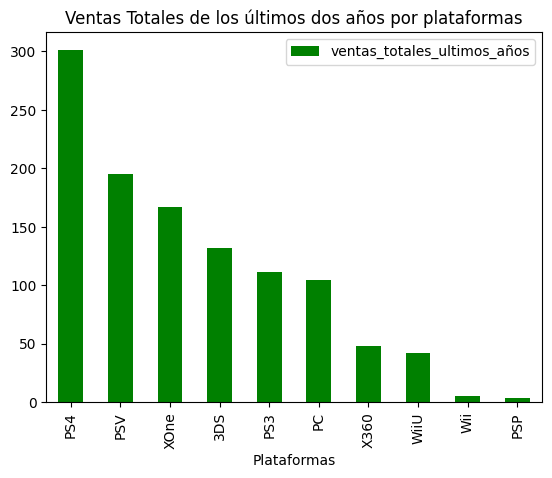

In [59]:
data_reciente = data.query('year_of_release >= (2017- 2.6)')
plataformas_mas_vendidas = data_reciente.groupby('platform')['name'].count().reset_index().sort_values(by= 'name', ascending=False).set_index('platform')
plataformas_mas_vendidas.columns = ['ventas_totales_ultimos_años']
display(plataformas_mas_vendidas)
plataformas_mas_vendidas.plot(kind= 'bar', title= 'Ventas Totales de los últimos dos años por plataformas', xlabel= 'Plataformas', color= 'green')
plt.show()

<font color="green">
Un análisis de las ventas de los últimos dos años y medio nos demuestra una clara tendencia de la industria a la venta de juegos relacionados a las consolas mas modernas y por ende mas potentes, quedando relegadas las ventas de plataformas mas antiguas (aunque puedan pertenecer a la misma empresa de juegos). Esto indica una clara tendencia al consumo de mayor calidad de juegos, por ende, una mayor venta de los juegos de plataformas mas recientes.


- Si tuvieramos que elegir plataformas prometedoras, tomaría las punta de linea de las distintas marcas: PS4, Xone, 3DS.
- Esta elección quedaría invalidada en cuanto dichas empresas liberen una consola mas nueva.
- Esto también permite una conclusión aparte, ya que, las plataformas mas rentables son aquellas modernas que aún no lanzan una nueva consola o no estan cercanas a hacerlo.

#### <font color="green">  DISTRIBUCIÓN DE LAS VENTAS DE JUEGOS POR PLATAFORMA

<font color="green"> 
Ahora a los cálculos de ventas por plataformas a nivel mundial:

- Primero voy a agrupar por plataformas y tomar las ventas totales y calcular el promedio de las mismas, organizándolas en orden de mayor venta promedio a menor venta promedio.
- Segundo voy a crear un gráfico de cajas para las plataformas y sus ventas totales a nivel del mundo. AL hacerlo, voy a usar la escala logarítmica en el eje y ya que me permite visualizar mejor las diferencias entre las plataformas.

In [60]:
ventas_promedio = data.groupby('platform')['total_sales'].mean().reset_index().set_index('platform').sort_values(by= 'total_sales', ascending=False)
display(ventas_promedio.head(10))


,total_sales
platform,
GB,2.606735
NES,2.561735
GEN,1.050000
SNES,0.836987
PS4,0.801378
X360,0.769746
2600,0.729173
PS3,0.705973
Wii,0.687508


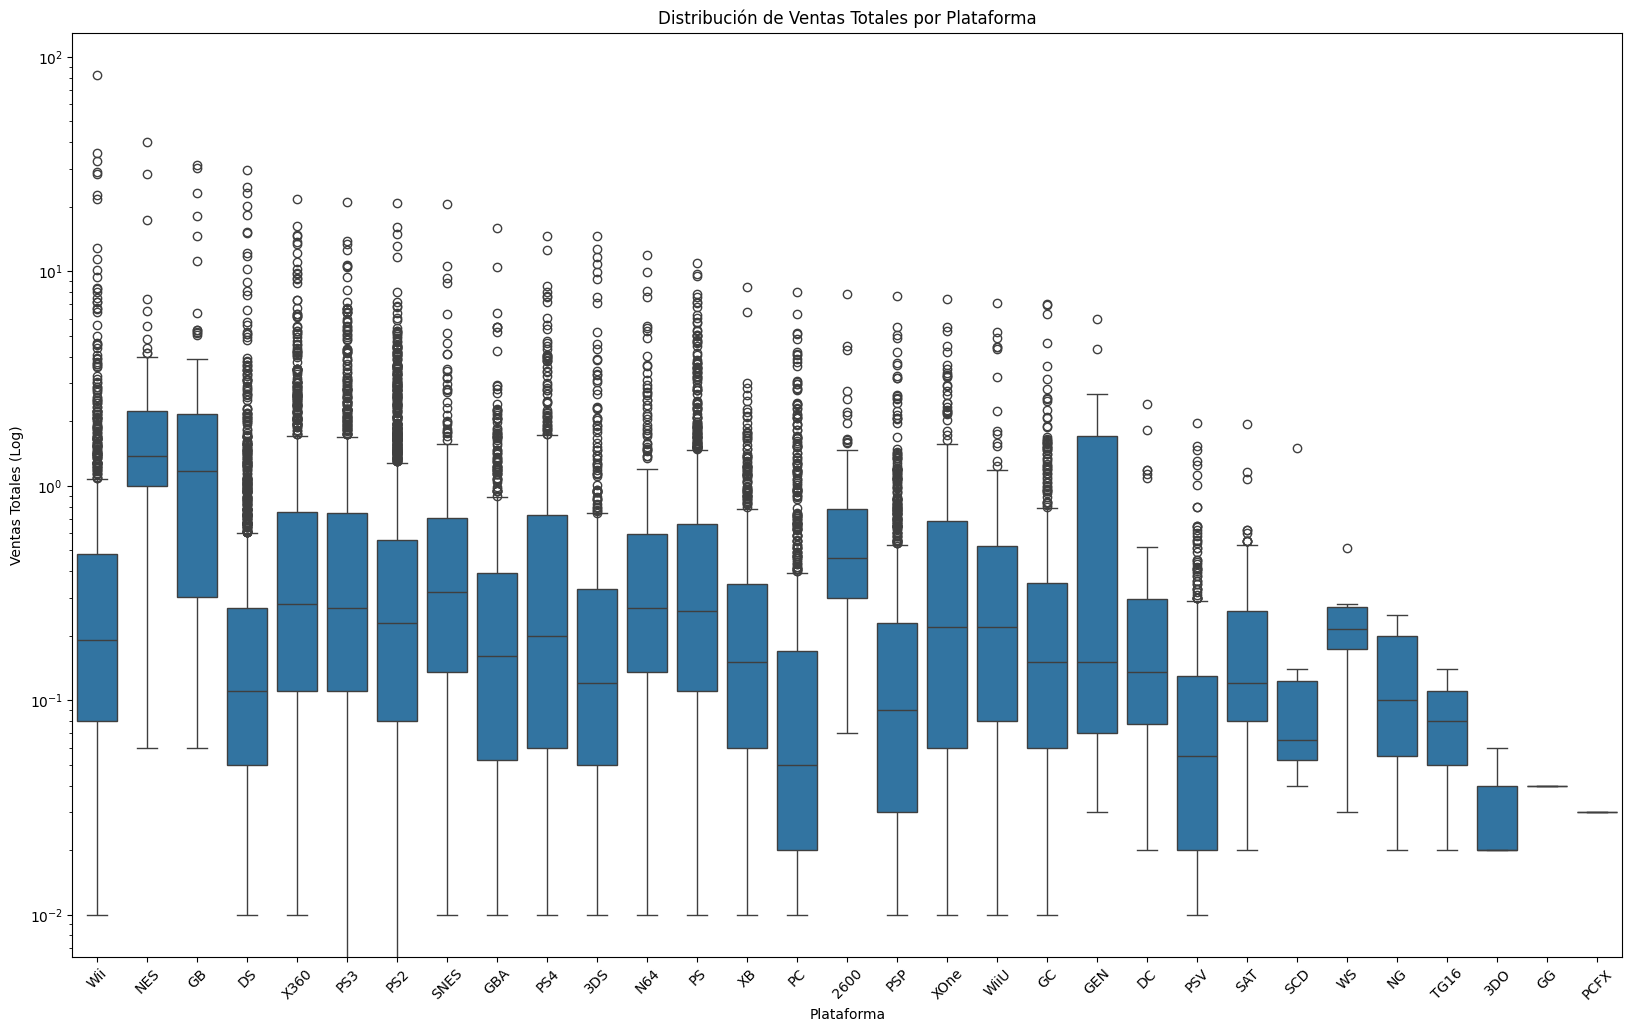

In [61]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='platform', y='total_sales', data=data)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (Log)')
plt.show()

<font color="green">
En el gráfico de cajas desglosé las ventas mundiales de los juegos acorde a cada plataforma. 
Es importante entender que al usar escalas logarítmicas, el gráfico es mas legible pero no aprecian los valores exactos.

- La interpretación correcta es que la línea media de cada caja es la mediana de ventas para esa plataforma. Un valor mas alto indica mayores ventas en el 50% de los casos. 
- Por otro lado, una caja de menor tamaño indica una menor variabilidad de los valores de ventas para esa plataforma, como por ejemplo NES.
- Los valores fuera del "bigote" indican valores atípicos. En el caso de los juegos, una plataforma con mayor cantidad de valores atípicos y de alta venta indica que son capaces de generar títulos atractivos que destacan del promedio de juegos para esa consola.
- Una consola con muchos valores atípicos sería rentable a un primer análisis, como por ejemplo Wii, NES, GB y DS en primera instancia. Cabe destacar que como el gráfico de ventas en el mundo no contempla las plataformas mas recientes, puede que algunas de las elegidas no cumplan con el criterio del punto previo.
- A continuación voy a realizar el mismo gráfico pero para las plataformas con mas ventas actuales.

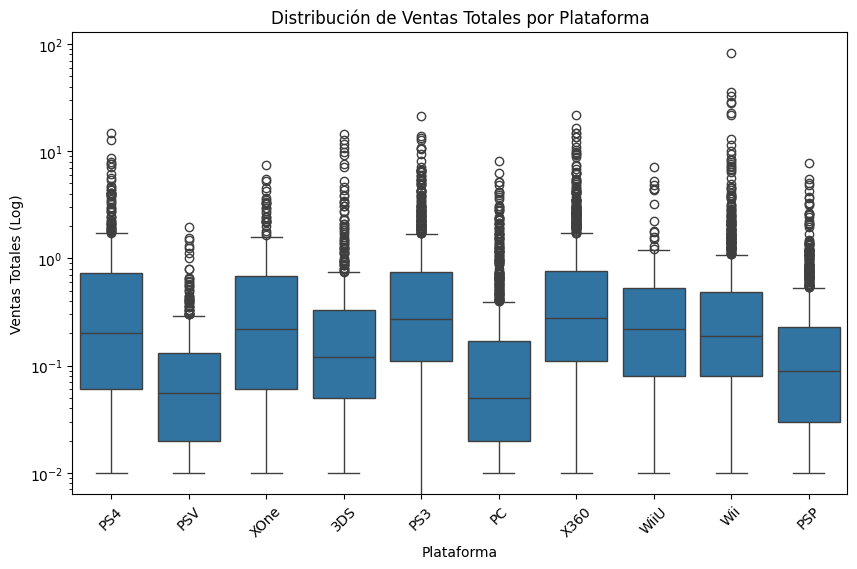

In [62]:
plataformas_rentables = plataformas_mas_vendidas.reset_index()
plataformas_rentables = plataformas_rentables['platform'].reset_index()
plataformas_rentables_total_sales = plataformas_rentables.merge(data, on= 'platform', how= 'left')
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=plataformas_rentables_total_sales)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (Log)')
plt.show()


<font color="green">
Específicamente en análisis de las ventas mundiales de juegos para las plataformas que mas ventas tuvieron estos últimos años, nos muestran como mas prometedoras PS4 y Xone.
Cabe destacar que ambas son la competencia de punta en la industria de consolas para el año de los datos del presente DF, lo cual le da certeza al análisis.

Si tuviéramos que recomendar, PS4 impresiona presentar mas títulos atípicos que Xone, y podría ser mas rentable de las dos consolas.

#### <font color="green"> IMPACTO DE LA PUNTUACIÓN DE LOS CRITICOS Y USUARIOS EN LAS VENTAS DE JUEGOS

<font color= "green">
Ahora a revisar el impacto de las puntuaciones de usuario y de los críticos respecto de una plataforma de mi elección. 
Personalmente por gusto y por la recomendación previa voy a elegir PS4.

- En primer lugar voy a filtrar el DF para obtener solo los datos de la PS4.
- Luego voy transformar los valores de la columna user_score a numéricos y voy a equipararlos a critic_score ya que estan en escala de 1-10 y critic esta en escala de 1-100.
- Luego voy a crear un gráfico de dispersión para comparar como afecta cada una de las críticas las ventas de los distintos juegos de la PS4.
- Ya que hay valores ausentes en la crítica de los juegos, voy a eliminarlos para que el gráfico de dispersión me muestre efectivamente el impacto de la crítica con las ventas de los distintos juegos. A fines estadísticos no deberían borrarse estos valores ausentes, pero no son útiles para establecer una relación entre crítica y ventas, motivo por el cual voy a borrarlos.

In [63]:
ps4_data = data[data['platform'] == 'PS4']
ps4_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    float64
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    object 
 10  rating           255 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), object(5)
memory usage: 39.8+ KB


In [64]:
ps4_data = data[data['platform'] == 'PS4'].copy()
ps4_data.loc[:, 'user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')
ps4_data.loc[:, 'user_score'] = ps4_data['user_score'] * 10
ps4_data = ps4_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])
display(ps4_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016.0,Action,0.01,0.00,0.00,0.00,42.0,23.0,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,70.0,68.0,T,0.01
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,75.0,NaN,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,79.0,T,0.01


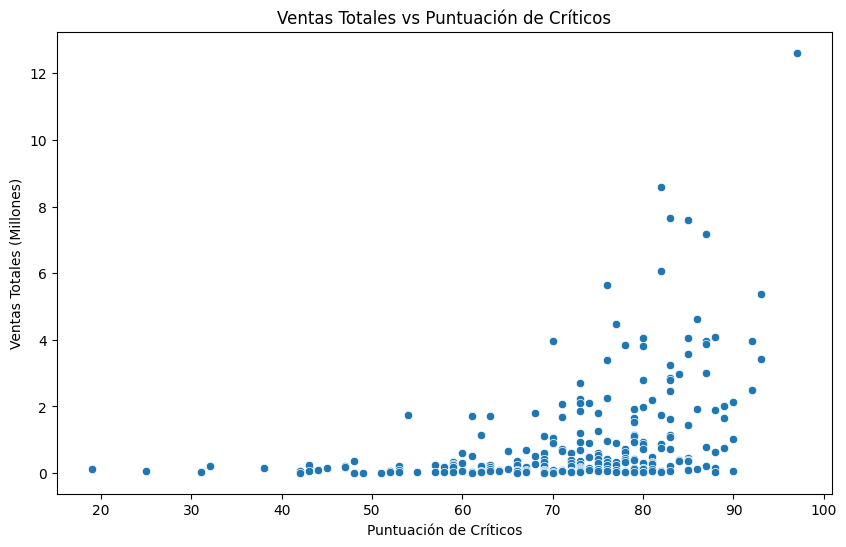

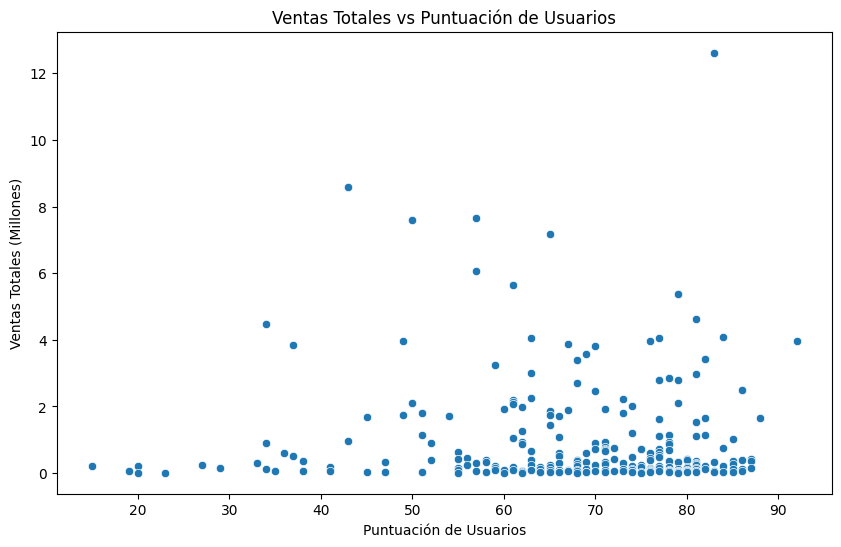

Correlación entre las ventas totales y la puntuación de críticos: 0.40589480145836687
Correlación entre las ventas totales y la puntuación de usuarios: -0.03362497596528888


In [65]:
# Hago el gráfico de dispersión para critica profesional
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Ventas Totales vs Puntuación de Críticos')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (Millones)')
plt.show()

# Hago el gráfico de dispersión para critica de usuario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Ventas Totales vs Puntuación de Usuarios')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (Millones)')
plt.show()

# Aqui calculo las correlaciones para los dos tipos de criticas
correlacion_criticos = ps4_data['critic_score'].corr(ps4_data['total_sales'])
correlacion_usuarios = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre las ventas totales y la puntuación de críticos: {correlacion_criticos}")
print(f"Correlación entre las ventas totales y la puntuación de usuarios: {correlacion_usuarios}")


<font color= "green">
Al crear los dos gráficos de dispersión, y calcular al mismo tiempo la correlacion entre las distintas críticas y las ventas, es notorio que las críticas de profesionales tienen una mayor correlación (positiva, 0.4) con las ventas y presentan una relación con mayor tendencia lineal, mientras que las críticas de usuarios no presentan una relación lineal con las ventas ( correlacion negativa, -0.03), indicando el poco impacto que la crítica de usuario genera en las ventas y el notorio impacto que la critica profesional genera en las ventas.

#### <font color="green"> VENTAS POR PLATAFORMA PARA EL MISMO JUEGO

<font color="green">
Ahora a comparar las ventas de distintos juegos para distintas consolas.
Lo que voy a hacer es lo siguiente.

- Voy a establecer un mínimo de plataformas en las que un juego tiene que estar representado para que la comparación sea válida.
- Voy a filtrar el DF con los juegos que cumplan dicho requisito.
- Voy a agrupar por nombre y plataforma los juegos y calcular sus ventas totales.
- Luego voy a seleccionar al azar tres juegos y mostrar como varían sus ventas dependiendo de las plataformas en las que se hayan lanzado. 

In [66]:
plataformas_minimas = 4
juegos_plataformas = data.groupby('name')['platform'].nunique()
juegos_con_varias_plataformas = juegos_plataformas[juegos_plataformas >= plataformas_minimas].index.tolist()
df_juegos_varias_plataformas = data[data['name'].isin(juegos_con_varias_plataformas)]
ventas_por_juego_plataforma = df_juegos_varias_plataformas.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
juego_seleccionado = df_juegos_varias_plataformas.sample(n=1, random_state=50)['name'].iloc[0]
juego_seleccionado_dos = df_juegos_varias_plataformas.sample(n=1, random_state=35)['name'].iloc[0]
juego_seleccionado_tres = df_juegos_varias_plataformas.sample(n=1, random_state=21)['name'].iloc[0]
ventas_juego_seleccionado = ventas_por_juego_plataforma[ventas_por_juego_plataforma['name'] == juego_seleccionado]
ventas_juego_seleccionado_dos = ventas_por_juego_plataforma[ventas_por_juego_plataforma['name'] == juego_seleccionado_dos]
ventas_juego_seleccionado_tres = ventas_por_juego_plataforma[ventas_por_juego_plataforma['name'] == juego_seleccionado_tres]
print("Ventas por plataforma para el juego", juego_seleccionado)
print(ventas_juego_seleccionado[['platform', 'total_sales']])
print("Ventas por plataforma para el juego", juego_seleccionado_dos)
print(ventas_juego_seleccionado_dos[['platform', 'total_sales']])
print("Ventas por plataforma para el juego", juego_seleccionado_tres)
print(ventas_juego_seleccionado_tres[['platform', 'total_sales']])

Ventas por plataforma para el juego Warriors Orochi 3
     platform  total_sales
2653      PS3         0.62
2654      PS4         0.15
2655      PSP         0.11
2656      PSV         0.07
2657     X360         0.16
2658     XOne         0.04
Ventas por plataforma para el juego Tiger Woods PGA Tour 06
     platform  total_sales
2397       GC         0.10
2398      PS2         0.89
2399      PSP         0.19
2400     X360         0.30
2401       XB         0.48
Ventas por plataforma para el juego F1 2011
    platform  total_sales
527      3DS         0.17
528       PC         0.19
529      PS3         1.21
530      PSV         0.13
531     X360         0.71


<font color="green">
A un simple análisis de tres juegos aleatorios que fueron vendidos en distintas plataformas, es claro la predominancia de plataformas PS respecto de otros modelos.
Al igual que sugerí en conclusiones previas, las mayores ventas las manejan PS4, Xone. Lo lógico es pensar que los resultados para juegos que se venden en múltiples plataformas corroboren mayores ventas en PS que en otras.

#### <font color="green">  VENTAS POR GÉNERO

<font color="green">
Ahora voy a tratar de agrupar los datos del DF para poder determinar que géneros presentan mas ventas.

- Primero voy a agrupar el DF por genero y títulos de juego, calculando las ventas totales.
- Segundo voy a extraer los valores de ventas y cantidad de títulos del DF y volver a fusionarlos.
- Voy a ordenarlos en orden decreciente para poder determinar facilmente que géneros se condicen con mayores ingresos.

,total_sales,titulos_lanzados
genre,,
"(Action,)",1744.17,1957
"(Sports,)",1331.27,1379
"(Shooter,)",1052.45,825
"(Role-Playing,)",934.56,1226
"(Platform,)",827.77,588
"(Misc,)",802.51,1330
"(Racing,)",728.67,772
"(Fighting,)",447.53,613
"(Simulation,)",389.97,729


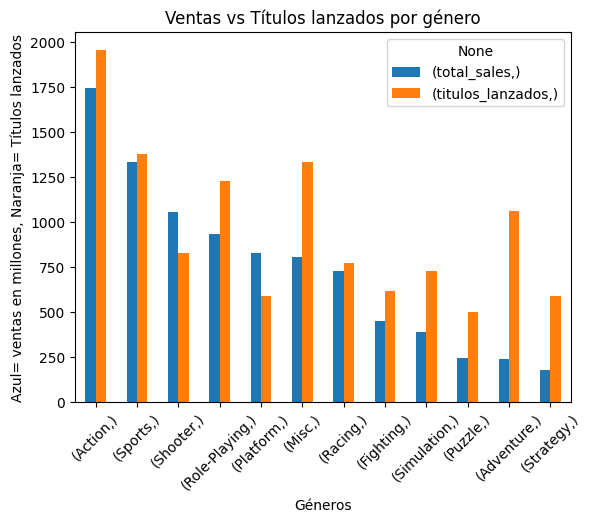

In [67]:
data_by_genre = data.groupby(['genre', 'name'])['total_sales'].sum().reset_index()
sales_by_genre = data_by_genre.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
games_by_genre = data_by_genre.groupby('genre')['name'].count().reset_index().sort_values(by='name', ascending=False)
games_genre_sales = sales_by_genre.merge(games_by_genre, on= 'genre')
games_genre_sales.columns = [['genre', 'total_sales', 'titulos_lanzados']]
games_genre_sales = games_genre_sales.set_index('genre')
display(games_genre_sales)
games_genre_sales.plot(kind='bar', title= 'Ventas vs Títulos lanzados por género', xlabel= 'Géneros', rot=45, ylabel= 'Azul= ventas en millones, Naranja= Títulos lanzados')
plt.show()

<font color="green">

De los datos evaluados podemos concluir que:

- Los dos géneros mas vendidos son accion y deportes, presentando a su vez la mayor cantidad de títulos lanzados.
- Hay géneros que tienen mas títulos y presentan aun menos ingresos que otros, por ejemplo, tirador tiene 825 titulos y es tercero en el orden de ventas totales, mientras que aventura tiene 1062 titulos y sin embargo es penúltimo en ventas totales.
- No solo es importante determinar que consolas son rentables, sino que género es rentable si vamos a orientar a nuestros clientes al respecto.

## <font color="green"> PERFIL DE USUARIOS

<font color="green"> 
Hasta ahora hicimos un análisis de ventas por género, por plataforma, pero de una manera global. Ahora vamos a separar por perfil de usuario las ventas de NA, UE y JP y evaluar sus diferencias y similitudes, en género, tendencias, plataformas mas usadas.

<font color="green">USUARIOS NA

In [68]:
na_platform_data = data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending=False)
display(na_platform_data.head(5))

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


In [69]:
na_genre_data = data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending=False)
display(na_genre_data.head(5))

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


In [70]:
na_raiting_data = data.groupby('rating')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending=False)
display(na_raiting_data.head(5))

,rating,na_sales
1,E,1292.99
7,T,759.75
5,M,748.48
2,E10+,353.32
4,K-A,2.56


<font color="green"> Análisis usuarios NA:
- Los 5 géneros mas consumidos por usuarios NA coiciden a nivel general en sus tres primeras categorías que son accion, deportes y tirador. En cuarto y quinto lugar tenemos juegos de plataforma y misceláneas.
- Los usuarios de NA presentan uso preferente de consolas PS y Xbox, con Wii y nintendo (DS) como parte de las 5 mas usadas.
- Respecto del rating de juegos, hay un mayor consumo en los juegos que son para todo público(E), siguiendo en contenido para adolescentes(T) y en tercer lugar para mayores de 17 años(M). Claramente hay una relación en la cantidad de ventas y la clasificación ya que es lógico pensar que si un juego es para todo público, va a ser consumido por mas personas de distintos rangos etarios.

<font color="green">USUARIOS UE

In [71]:
eu_platform_data = data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending=False)
display(eu_platform_data.head(5))
eu_genre_data = data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending=False)
display(eu_genre_data.head(5))
eu_raiting_data = data.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending=False)
display(eu_raiting_data.head(5))

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


,rating,eu_sales
1,E,710.25
5,M,483.97
7,T,427.03
2,E10+,188.52
0,AO,0.61


<font color="green"> Análisis usuarios EU:
- Los 5 géneros mas consumidos por usuarios EU coiciden a nivel general en sus tres primeras categorías que son accion, deportes y tirador. En cuarto y quinto lugar tenemos juegos de carreras y misceláneas. En comparación con los usuarios NA, coiciden en los tres géneros mas consumidos.
- Los usuarios de EU presentan uso preferente de consolas PS por encima de X360 (al revés que NA).
- Respecto del rating de juegos, hay un mayor consumo de juegos para todo publico, mientras que en segundo lugar se ubican los juegos para mayores de 17 años antes que los juegos catalogados para adolescentes. La población de jugadores europeos puede tener un perfil etario mayor al consumidor promedio de NA deduciendose de este análisis.

<font color="green">USUARIOS JP

In [72]:
jp_platform_data = data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending=False)
display(jp_platform_data.head(5))
jp_genre_data = data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending=False)
display(jp_genre_data.head(5))
jp_raiting_data = data.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending=False)
display(jp_raiting_data.head(5))

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


,rating,jp_sales
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20
4,K-A,1.46


<font color="green"> Análisis usuarios JP:
- Acá encontramos una divergencia interesante respecto de los usuarios previamente evaluados. El género mas consumido por usuarios de japón es juegos de rol, ocupando el segundo lugar accion y deportes el tercer lugar. 
- Los usuarios de JP presentan un mayor consumo de nintendo y PS, no presentando consumo de Xbox.(origen NA?)
- Respecto del rating de juegos, vemos un perfil similar al NA, con mayor consumo de apto para todo publico seguido de consumo para adolescente y luego para mayores de 17 años.

<font color="green"> COMPARACIÓN DE LOS TRES PERFILES DE USUARIO

Ahora vamos a fusionar los DF de los perfiles de usuario y comparar ventas en relación a plataformas, generos y rating.

In [73]:
platform_user_merge = na_platform_data.merge(eu_platform_data, on='platform', how='outer').merge(jp_platform_data, on='platform', how='outer').set_index('platform')
genre_user_merge = na_genre_data.merge(eu_genre_data, on='genre', how='outer').merge(jp_genre_data, on='genre', how='outer').set_index('genre')
rating_user_merge = na_raiting_data.merge(eu_raiting_data, on='rating', how='outer').merge(jp_raiting_data, on='rating', how='outer').set_index('rating')

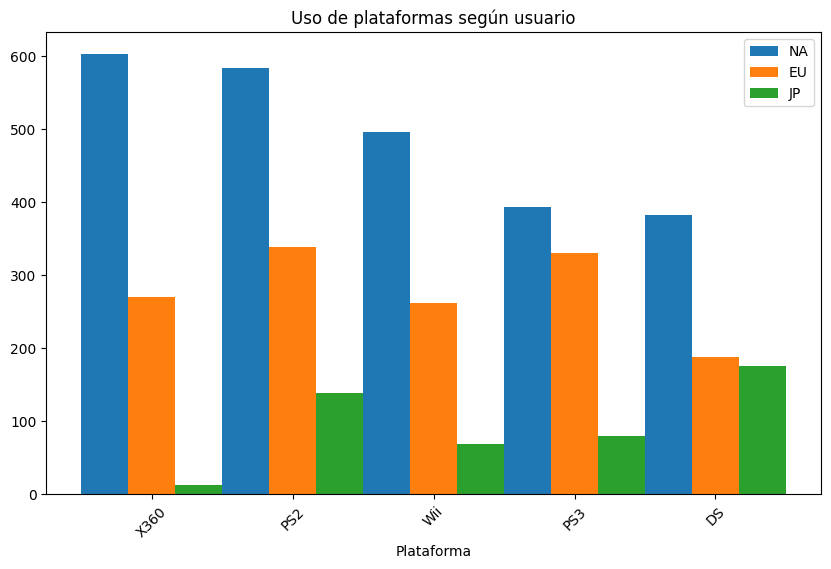

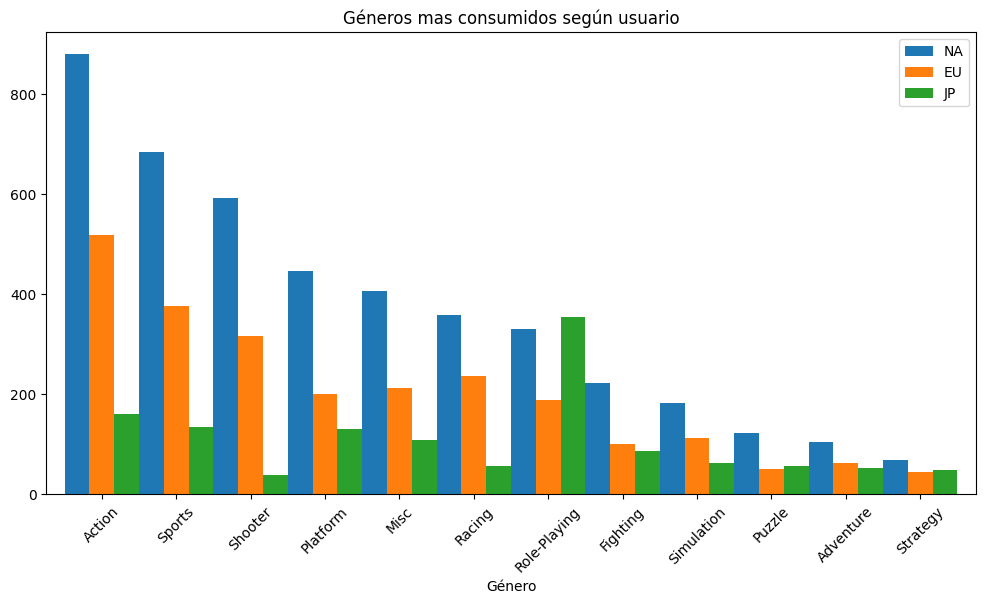

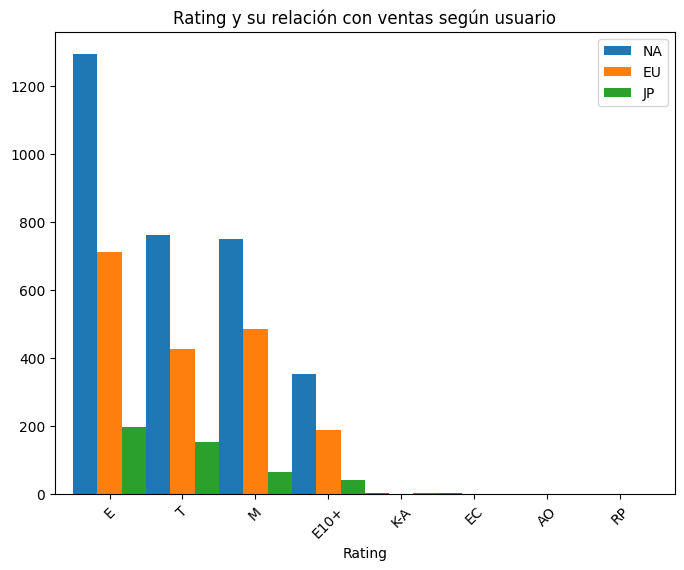

In [74]:
platform_user_merge.head(5).plot(kind='bar', figsize=[10, 6], xlabel='Plataforma', rot=45, width=1, title='Uso de plataformas según usuario')
plt.legend(['NA', 'EU', 'JP'])
genre_user_merge.plot(kind='bar',figsize=[12, 6], xlabel='Género', rot=45, width=1, title='Géneros mas consumidos según usuario')
plt.legend(['NA', 'EU', 'JP'])
rating_user_merge.plot(kind='bar',figsize=[8, 6], xlabel='Rating', rot=45, width=1, title='Rating y su relación con ventas según usuario')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

<font color="green"> Análisis comparativo de usuarios:
- Destaca en mayores ventas la poblacion NA en general.
- Los juegos mas consumidos son aptos para todo publico.
- Tanto NA como EU tienen mayor consumo de los géneros accion y deportes, mientras que en JP son sobrepasados por juegos de rol. La diferencia en cantidad e ventas de toda manera decanta por los juegos de accion y deportes ya que presentan mayor consumo en poblaciones mas numerosas.
- Las consolas con mas consumo son X360 y PS2, a pesar de que en JP X360 no se consuma, la poblacion NA y EU es mucho mayor y por lo tanto, el impacto de x360 se ve definido por este parámetro.

## <font color="green"> PRUEBAS ESTADISTICAS

<font color="green">

Vamos a abordar ahora dos hipótesis distintas y ver su validez estadística.

Por un lado queremos ver si las calificaciones promedio para usuarios de pc y xbox one son iguales.

### Hipótesis para las plataformas Xbox One y PC:

- Hipótesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [75]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [76]:
# Hipótesis para las plataformas Xbox One y PC
xbox_one_scores = data[data['platform'] == 'XOne']['user_score'].dropna().reset_index()
pc_scores = data[data['platform'] == 'PC']['user_score'].dropna().reset_index()

xbox_one_scores['user_score'] = pd.to_numeric(xbox_one_scores['user_score'], errors='coerce')
pc_scores['user_score'] = pd.to_numeric(pc_scores['user_score'], errors='coerce')
xbox_users_score_mean = xbox_one_scores['user_score'].mean()
pc_scores_mean = pc_scores['user_score'].mean()
t_statistic, p_value = st.ttest_ind(xbox_one_scores['user_score'], pc_scores['user_score'])
print("Valor p:", p_value)
print('La calificacion promedio de los usuarios de Xbox es de:', xbox_users_score_mean)
print('La calificacion promedio de los usuarios de PC es de:', pc_scores_mean)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")





Valor p: 1.3896435533548819e-05
La calificacion promedio de los usuarios de Xbox es de: 6.521428571428572
La calificacion promedio de los usuarios de PC es de: 7.062467532467533
Se rechaza la hipótesis nula. Hay evidencia suficiente para decir que las calificaciones promedio son diferentes.


<font color="green"> Conclusión primera hipotesis:

Dado que son dos valores independientes y queremos compararlos, usamos ttest_ind.

Elegimos una variabilidad maxima del 5%

Calculamos las medias y luego aplicamos el test estadistico.

A simple vista, uno podría pensar que los promedios son bastante cercanos(6.52 vs 7.06). Ahí esta lo valioso del ttest. AL revisar todos los valores de user_score, claramente hay una diferencia estadística que nos permite decir que las calificaciones promedio son diferentes. 

<font color="green">La segunda hiopotesis que queremos evaluar es: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Hipotesis para generos de Accion y deportes

- Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [77]:
action_games_score = data[data['genre'] == 'Action']['user_score'].dropna().reset_index()
sports_games_score = data[data['genre'] == 'Sports']['user_score'].dropna().reset_index()
action_games_score['user_score'] = pd.to_numeric(action_games_score['user_score'], errors='coerce')
sports_games_score['user_score'] = pd.to_numeric(sports_games_score['user_score'], errors='coerce')
action_games_score_mean = action_games_score['user_score'].mean()
sports_games_score_mean = sports_games_score['user_score'].mean()
t_statistic, p_value = ttest_ind(action_games_score['user_score'], sports_games_score['user_score'], equal_var=False)
alpha = 0.05
print("Valor p:", p_value)
print('El valor promedio de la calificación de los usuarios para el género de accion es de:', action_games_score_mean)
print('El valor promedio de la calificación de los usuarios para el género de deportes es de:', sports_games_score_mean)
if p_value < alpha:
    print("Hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No hay suficiente evidencia para decir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")



Valor p: 0.11483818791498286
El valor promedio de la calificación de los usuarios para el género de accion es de: 7.054043715846995
El valor promedio de la calificación de los usuarios para el género de deportes es de: 6.961196736174069
No hay suficiente evidencia para decir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


<font color="green"> Conclusión segunda hipotesis:

Dado que son dos valores independientes y queremos compararlos, usamos ttest_ind.

Elegimos una variabilidad maxima del 5%

Calculamos las medias y luego aplicamos el test estadistico.

Los valores que obtenemos de las medias de los dos conjuntos evaluados presentan poca diferencia numérica, pero dado que en la hipotesis previa eso no validó, vuelve a ser importante aplicar un test estadístico, ya que permite eliminar la subjetividad y los resultados lo demuestran. 

El valor p es mayor al 5% (11% de hecho), lo que indica no hay evidencia para decir que los promedios son estadísticamente diferentes. 
A la práctica, los dos géneros mas vendidos (action y sports) impresionan presentar una calificacion del usuario similar entre sí.

## <font color="green"> CONCLUSIONES DEL PROYECTO

En el presente proyecto hemos explorado un dataset de información de juegos, ventas por regiones de dichos juegos, fechas de lanzamiento de los mismos y consolas en las que era jugable cada uno de ellos.

- El primer paso fue realizar una exploración y limpieza de los datos, remplazando los valores ausentes suceptibles de ser remplazados y eliminando filas inutiles.
- Luego se corrijierons los tipos de datos, remplazando el acrónonimo de caliificaciones tbd para que se pudiera avanzar con el análisis del dataframe.
- Después de ello se inició con en análisis exploratorio de los datos objetivando:
   - juegos lanzados por año, evaluando de forma gráfica los años con mas lanzamientos (2010)
   - Luego se calculo la venta por plataformas y de ello se dedujeron los tiempos representativos que tardan en aparecer y desaparecer las plataformas con mas ventas.
   - Usando esos criterios de tiempo se identificaron las plataformas mas prometedoras para el 2017.
   - En un análisis mas profundo, se hizo evidente que hay plataformas que en la distribución de sus ventas presentaban mayores cantidades de valores atipicos altos, lo que se traducen como juegos con resultados excepcionales fuera de lo común. Uniendo esta información con la previa, se concluyó dentro de las plataformas mas rentables, cuales eran las que presentaban a su vez mayor cantidad de titulos excepcionales y en base a ello poder intuir cuales eran las mas rentables.
   - En un deseo de conocer el impacto de las críticas de los usuarios y profesionales en las ventas de los juegos, se exploraron por separado ambos conceptos, encontrando una correlacion positiva entre criticas profesionales y ventas de juegos, no asi con las críticas de los usuarios. Es decir, los juegos mejor puntuados por los criticos usualmente tenian mayores ventas.
   - Luego se enfocó el análisis en enteder que plataformas para el mismo juego eran mas rentables y que géneros eran mas consumidos. Destacaron las PS y Xbox entre las plataformas mas rentables y usadas actualmente y los géneros con mayores ventas coincidieron ser accion y deportes.
   - Un dato curioso que se desprende del análisis de los géneros mas consumidos es que no siempre los mas vendidos presentan la mayor cantidad de titulos lanzados. Un claro ejemplo es el género tirador, con menos lanzamientos que otros géneros, y con posición 3 en las ventas mundiales.
- Acto seguido el análisis se orientó en las poblaciones y no en los juegos específicamente.
   - Se calcularon las ventas por plataformas y generos para las poblaciones norteamericanas, europea y japonesa.
   - De estos resultados se derivaron conclusiones como que:
     - El mercado mas rentable es NA.
     - Los juegos mas jugados son de accion y deportes. (Rol para los japoneses)
     - La mayoría de los juegos mas vendidos eran para todo publico seguidos de clasificacion para adolescentes. (Europa presenta mayor consumo de juegos para adultos que para adolescentes).
     - Las plataformas Xbox(360) no eran casi usadas en japón.
- Por último se hizo un análisis estadístico para comprobar:
     - Si habia diferencias significativas entre los valores de las calificaciones promedio para usuarios de pc y xbox one.
     - Si habia diferencias significativas entre los valores de las calificacoines promedio para jugaores de accion y deportes.
     - Si bien los promedios en ambas hipotesis eran cercanos entre si, un análisis estadístico permitió confirmar diferncias significatvias en los valores promedio de las calificaciones de los usuarios de pc vs xbox one, y no se pudieron encontrar diferencias significativas entre las calificaciones de los usuarios de los dos géneros mas vendidos de juegos.

